In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [6]:
df['Spam'] = [1 if x == 'spam' else 0 for x in df['Category']]
df = df.drop('Category', axis=1)
df.head()

,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Spam'])

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train.values)
X_train_vectors.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vectors, y_train)

MultinomialNB()

In [12]:
X_test_vectors = vectorizer.transform(X_test.values)
model.score(X_test_vectors, y_test)

0.9877961234745154

In [13]:
import numpy as np

pd.DataFrame({
    'Sentence': X_test[:10],
    'Predicted': model.predict(X_test_vectors[:10]), 
    'Probability': [np.max(x) for x in model.predict_proba(X_test_vectors[:10])],
    'Truth': y_test[:10]
}) 

,Sentence,Predicted,Probability,Truth
4539,Dare i ask... Any luck with sorting out the car?,0,0.999759,0
626,"Haha good to hear, I'm officially paid and on ...",0,0.999953,0
5376,I don't want you to leave. But i'm barely doin...,0,1.000000,0
3163,I can't describe how lucky you are that I'm ac...,0,0.999998,0
2960,Buzzzz! *grins* Did I buzz your ass? Buzz your...,0,1.000000,0
967,I am not sure about night menu. . . I know onl...,0,1.000000,0
4328,Dude got a haircut. Now its breezy up there,0,0.999984,0
508,You should know now. So how's anthony. Are you...,0,1.000000,0
1930,Free 1st week entry 2 TEXTPOD 4 a chance 2 win...,1,1.000000,1
2095,PRIVATE! Your 2004 Account Statement for 07742...,1,1.000000,1


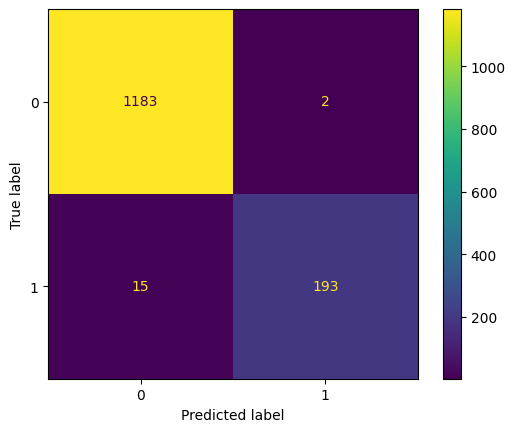

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay as CM
CM.from_predictions(y_test, model.predict(X_test_vectors))
plt.show()